In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sbn

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization,Convolution2D
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
df = pd.read_csv("data/fer2013/fer2013.csv")

In [3]:
df.shape

(35887, 3)

In [4]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [5]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [6]:
emotion_isimleri = {0:'kızgın', 1:'igrenme', 2:'korku', 3:'mutlu', 4: 'uzgun', 5: 'sasirma', 6: 'dogal'}

In [7]:
print("Verisetinin içerisindeki emotion sayıları :", df.emotion.value_counts() )

Verisetinin içerisindeki emotion sayıları : 3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


C:\Users\ceren\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


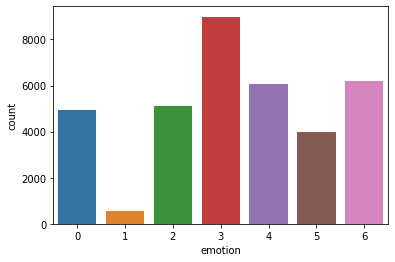

In [8]:
sbn.countplot(df.emotion)
plt.show()

In [9]:
import math
math.sqrt(len(df.pixels[0].split(' ')))

48.0

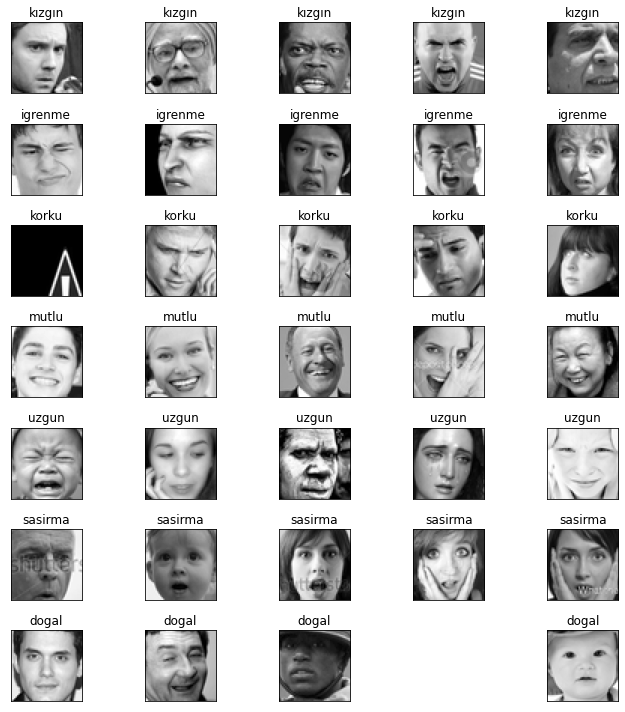

In [10]:
plt.figure(0,figsize=(10,10)) 
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(5):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 5, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_isimleri[label])
        plt.tight_layout()


In [11]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)
print("veri setinin içindeki eleman sayısı, yükseklik/genişlik ve kanal sayısı: ",img_array.shape)

veri setinin içindeki eleman sayısı, yükseklik/genişlik ve kanal sayısı:  (35887, 48, 48, 1)


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
print("veri setinin içindeki örnek ve sınıf sayısı: ",img_labels.shape)

veri setinin içindeki örnek ve sınıf sayısı:  (35887, 7)


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)

print('Eğitim için eleman sayısı, yükseklik/genişlik ve kanal sayısı: ', x_train.shape)
print('Test için eleman sayısı, yükseklik/genişlik ve kanal sayısı: : ',x_test.shape)

print('Eğitimdeki örnek ve sınıf sayısı :', y_train.shape) 
print('Testteki örnek ve sınıf sayısı : ',y_test.shape)

Eğitim için eleman sayısı, yükseklik/genişlik ve kanal sayısı:  (32298, 48, 48, 1)
Test için eleman sayısı, yükseklik/genişlik ve kanal sayısı: :  (3589, 48, 48, 1)
Eğitimdeki örnek ve sınıf sayısı : (32298, 7)
Testteki örnek ve sınıf sayısı :  (3589, 7)


In [14]:
img_width = x_train.shape[1]
img_height = x_train.shape[2]
img_depth = x_train.shape[3]
num_classes = y_train.shape[1]

x_train /= 255 
x_test /= 255

print('eğitim için kullanılacak örnek sayısı: ', x_train.shape[0])
print('test için kullanılacak örnek sayısı: ',x_test.shape[0])
print( 'farklı yüz ifadelerinin sayısı: ',y_test.shape[1])

eğitim için kullanılacak örnek sayısı:  32298
test için kullanılacak örnek sayısı:  3589
farklı yüz ifadelerinin sayısı:  7


In [15]:
def show(img):
    show_image = img.reshape(48,48)
    
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')  

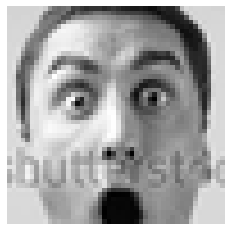

In [16]:
show(x_train[1000])

In [21]:
input_reshape = (48, 48, 1)

model = Sequential()
#1.Katman
model.add(Convolution2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = input_reshape))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Convolution2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

#2.Katman
model.add(Convolution2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = input_reshape))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Convolution2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

#3.Katman
model.add(Convolution2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = input_reshape))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Convolution2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

#4.Katman
model.add(Convolution2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = input_reshape))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Convolution2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.2))

#Bağlantı Katmanı
model.add(Flatten())
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dropout(0.3))

#Çıkış Katmanı
model.add(Dense(units = 7 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)        

In [26]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', mode='min',save_best_only=True,verbose=1)
earlystop = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs =20, batch_size=128,callbacks = [earlystop,checkpoint,reduce_lr], validation_data=(x_test, y_test))

Epoch 1/20
253/253 [==============================] - ETA: 0s - loss: 1.8275 - accuracy: 0.2473
Epoch 00001: val_loss improved from inf to 1.81198, saving model to EmotionDetectionModel.h5
253/253 [==============================] - 470s 2s/step - loss: 1.8275 - accuracy: 0.2473 - val_loss: 1.8120 - val_accuracy: 0.2505
Epoch 2/20
253/253 [==============================] - ETA: 0s - loss: 1.8131 - accuracy: 0.2505
Epoch 00002: val_loss did not improve from 1.81198
253/253 [==============================] - 462s 2s/step - loss: 1.8131 - accuracy: 0.2505 - val_loss: 1.8151 - val_accuracy: 0.2505
Epoch 3/20
253/253 [==============================] - ETA: 0s - loss: 1.8103 - accuracy: 0.2516
Epoch 00003: val_loss improved from 1.81198 to 1.80546, saving model to EmotionDetectionModel.h5
253/253 [==============================] - 446s 2s/step - loss: 1.8103 - accuracy: 0.2516 - val_loss: 1.8055 - val_accuracy: 0.2505
Epoch 4/20
253/253 [==============================] - ETA: 0s - loss: 1.768

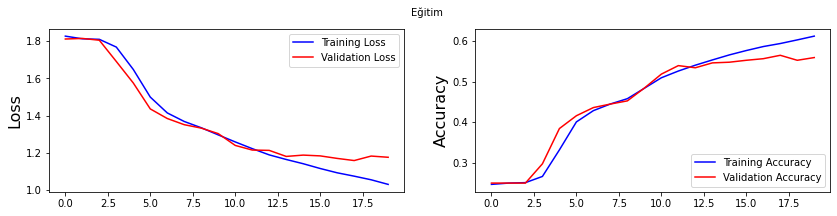

In [29]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)


plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [30]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.9126799702644348
Train accuracy: 65.81522226333618
Test loss: 1.1766473054885864
Test accuracy: 55.893003940582275


In [31]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
from skimage import io

In [32]:
objects = ('kızgın', 'iğrenme', 'korku', 'mutlu', 'üzgün', 'şaşırma', 'doğal')
y_pos = np.arange(len(objects))

In [40]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.title('emotion')
plt.show()

In [41]:
y_pred=model.predict(x_test)

In [139]:
import face_recognition
path_image='resimler/iğrenme.jpg'

image2 = face_recognition.load_image_file(path_image)

face_locations = face_recognition.face_locations(image2)

top, right, bottom, left = face_locations[0]
face_image1 = image2[top:bottom, left:right]
image_save = Image.fromarray(face_image1)
image_save.save("image_1.jpg")
image1 ='image_1.jpg'

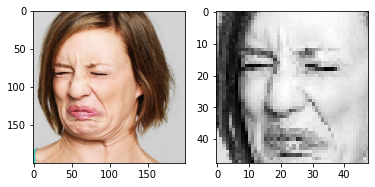

Duygu İfadesi Tahmini: kızgın


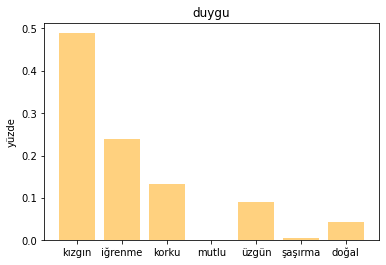

In [140]:


img = image.load_img(image1, grayscale=True, target_size=(48, 48))
show_img=image.load_img(path_image, grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.subplot(1, 2, 1)
plt.gray()
plt.imshow(show_img)

plt.subplot(1, 2, 2)
plt.gray()
plt.imshow(img)
plt.show()

plt.tight_layout()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Duygu İfadesi Tahmini:',objects[ind])

y_pos = np.arange(len(emotion_isimleri))

plt.bar(y_pos, custom[0], align='center', alpha=0.5, color='orange')
plt.xticks(y_pos, objects)
plt.ylabel('yüzde')
plt.title('duygu')
plt.show()
